In [25]:
# Importando Bibliotecas
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
from pmdarima.arima import auto_arima


In [4]:
# importando dados e convertendo para datetime
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('dados\AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

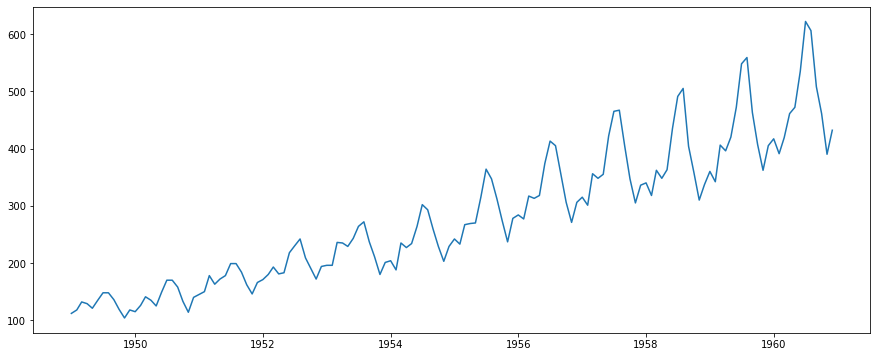

In [5]:
# Gráfico dos dados
plt.plot(data)

In [6]:
# Criando modelo ARIMA
stepwise_model = auto_arima(data, start_p=1,start_q=1,start_d= 0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=1.98 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=1.48 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=2.97 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.73 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=1.23 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=4.72 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=1.28 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=30.33 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=13.50 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=1.39 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=10.75 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=1.35 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=4.26 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=13.87 sec
 

Aplicando o auto Arima, com tepwise=False que não utiliza uma otimização, ou seja testa mais modelos, porem pode ser mais lento que o modo tepwise=True que testa menos modelos, logo se torna mais rapido.

Ao utilizar o Auto Arima buscar o melhor modelo, que seria aquele com AIC menor, no caso encontramos 1012.990796463468, por meio da combinação ARIMA(0,1,1)(1,1,2)[12]

O objetivo e ter o melhor modelo, para assim termos a melhor previsão!

In [9]:
print(stepwise_model.aic())

1012.990796463468


In [10]:
# Separamos o dados de treino e teste, pegamos os dados de 1949 até 1959 para treino e os dados de 1960 até 1961 para teste
# O modelo vai aprender com os dados de treino e vamos usar os dados de teste para validar o modelo
# O modelo deve ser treinado e com dados diferentes dos dados de teste, para não haver enviesamento, por isso separamos 
# dados de treino e teste.

train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [12]:
# Treinando o modelo
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [19]:
# Usando o modelo para fazer previsões de 12 meses
future_forecast = stepwise_model.predict(n_periods=12)

In [20]:
# Visualizando as previsões
future_forecast

1960-01-01    420.233735
1960-02-01    398.451258
1960-03-01    461.901047
1960-04-01    450.682455
1960-05-01    473.997045
1960-06-01    537.909507
1960-07-01    612.224030
1960-08-01    623.577142
1960-09-01    520.159278
1960-10-01    462.311475
1960-11-01    412.924939
1960-12-01    453.744828
Freq: MS, dtype: float64

In [22]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])

<AxesSubplot:xlabel='Month'>

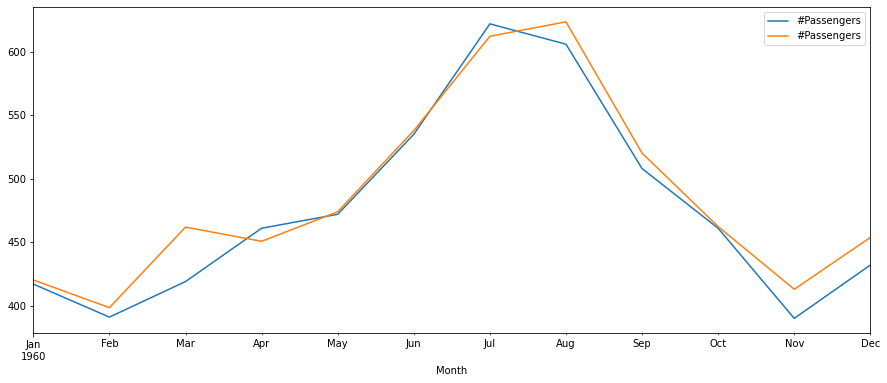

In [23]:
# Concatenando os dados de treino e teste e plotando o gráfico
# Em azul estão os dados de teste (1960-1961), em laraja estão as previsões do modelo
# Como podemos notar o modelo está fazendo previsões muito próximas dos dados de teste
# Lembrando que o modelo foi treinado com dados de 1949-1959, ou seja não teve contato com os dados de 1960-1961
# O modelo está fazendo previsões muito próximas dos dados de teste, isso é um bom sinal
pd.concat([test,future_forecast],axis=1).plot()

<AxesSubplot:xlabel='Month'>

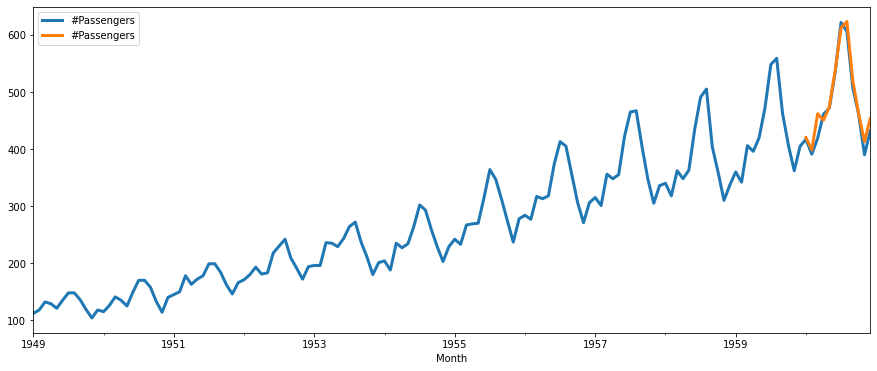

In [24]:
# Grafico mesclando os dados de treino e teste
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)